In [3]:
import requests
import time
import json, os
import urllib.request
import matplotlib
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud
from IPython.display import set_matplotlib_formats
from bs4 import BeautifulSoup
from selenium import webdriver

%matplotlib inline
matplotlib.rc('font', family = 'Malgun Gothic')
set_matplotlib_formats('retina')
matplotlib.rc('axes', unicode_minus = False)
twitter = Twitter()

with open('D:/SBA/filtering.txt', 'r') as f:
    lines = f.readlines()
    lines = [_.strip('\n') for _ in lines]

C:\Users\cdetg\AppData\Roaming\Python\Python38\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [13]:
driver = webdriver.Chrome()
driver.get("https://section.blog.naver.com/Search/Post.nhn?pageNo=1\
           &rangeType=ALL&orderBy=sim&keyword=제주도 여행")

In [17]:
total = []
for i in range(2):
    for j in range(7):
        driver.find_elements_by_css_selector(f"div.area_list_search > div:nth-child({j+1}) > div > div.info_post > div > a")[0].click()
        driver.switch_to.window(driver.window_handles[-1])
        driver.switch_to.frame("mainFrame")
        dom = BeautifulSoup(driver.page_source, "lxml")
        word_list = dom.select(".se-main-container .se-text span")
        word_list = "".join([_.text for _ in word_list if _.text != '\u200b'])
        morphs = []
        for k in twitter.pos(word_list):
            morphs.append(k)
        noun_adj_adv_list = []
        for word, tag in morphs:
            if (tag in ['Noun'] and len([_ for _ in lines if _ not in word]) == len(lines)):
                noun_adj_adv_list.append(word)
        total += noun_adj_adv_list
        driver.close()
        driver.switch_to.window(driver.window_handles[0])
    driver.find_elements_by_css_selector(f".pagination span:nth-child({i+2}) > a")[0].click()
    time.sleep(2)
count = Counter(total)
words = dict(count.most_common())

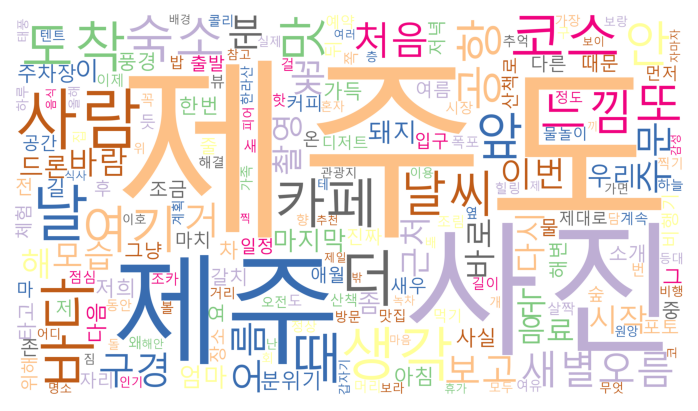

In [19]:
wordcloud = WordCloud(font_path = "C:Windows/Fonts/malgun.ttf", background_color='white', colormap = "Accent_r",
                     width = 3500, height = 2000).generate_from_frequencies(words)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()